### Question 1

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import merged dataset

path = r'/Users/selcenayranci/Desktop/4th Achievement -  Instacart Basket Analysis March 2024'

In [3]:
ords_prods_cus = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'ords_prods_cus.pkl'))

### Question 3

In [4]:
ords_prods_cus.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,...,loyalty_flag,avg_spending,spending_flag,order_frequency,order_frequency_flag,Gender,Age,n_dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,...,New customer,6.367797,Low spender,20.0,Regular customer,Female,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,New customer,6.367797,Low spender,20.0,Regular customer,Female,31,3,married,40423
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,New customer,6.367797,Low spender,20.0,Regular customer,Female,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,New customer,6.367797,Low spender,20.0,Regular customer,Female,31,3,married,40423
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,New customer,6.367797,Low spender,20.0,Regular customer,Female,31,3,married,40423


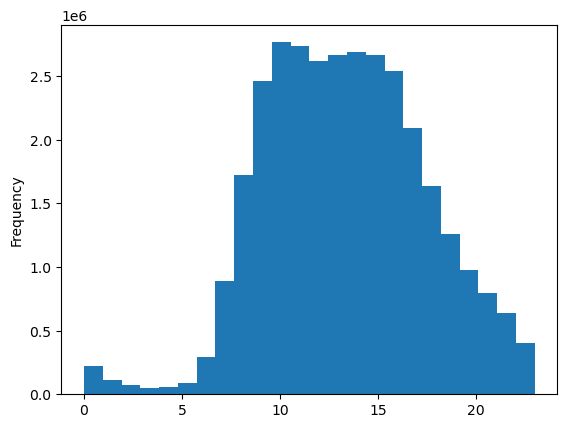

In [31]:
# Creating a histogram of the “order_hour_of_day” column

hist = ords_prods_cus['order_hour_of_day'].plot.hist(bins = 24)

##### I created a histogram with 24 bins so that each hour of the day would have its own bin. Based on the histogram orders are made mostly between 10am and 4pm and least amount of orders are made between midnight and 6am.

### Question 4

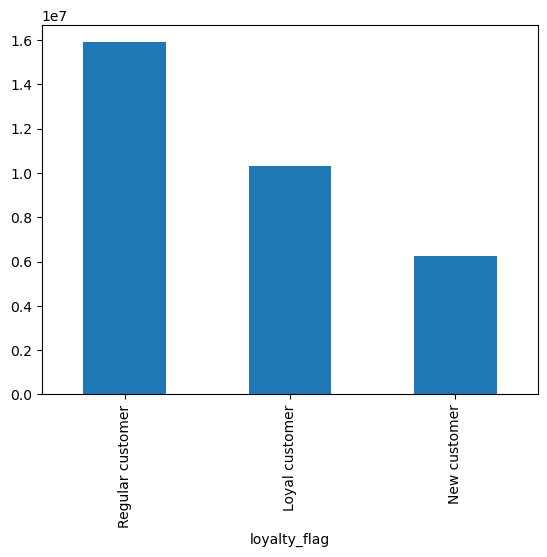

In [13]:
#  Create a bar chart from the “loyalty_flag” column to see the distribution of orders among customers in terms of loyalty

bar = ords_prods_cus['loyalty_flag'].value_counts().plot.bar()

### Question 5

##### Check the difference in expenditure depending on the hour of the day


In [14]:
# Creating a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cus)) <= 0.7

In [15]:
# Store 70% of the sample in the dataframe big

big = ords_prods_cus[dev]

In [16]:
# Store 30% of the sample in the dataframe small

small = ords_prods_cus[~dev]

In [17]:
len(ords_prods_cus)

32434212

In [18]:
len(big) + len(small)

32434212

In [20]:
sample = small[['order_hour_of_day', 'prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


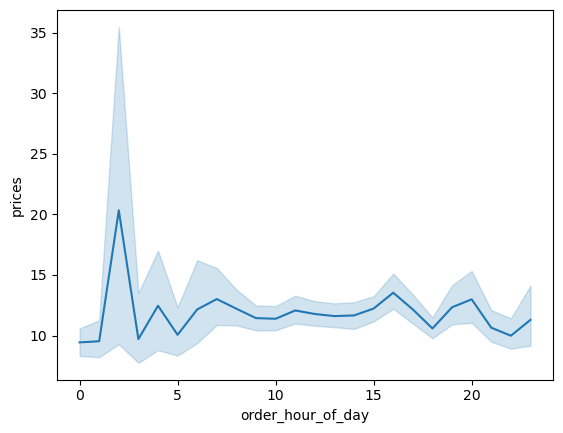

In [21]:
# Creating a line chart

line = sns.lineplot(data = sample, x = 'order_hour_of_day', y = 'prices')

### Question 6
##### Checking if there’s a connection between age and family situation for targeted marketing campaigns

In [23]:
# Creating a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cus)) <= 0.7

In [24]:
# Store 70% of the sample in the dataframe big

big_2 = ords_prods_cus[dev]

In [25]:
# Store 30% of the sample in the dataframe small

small_2 = ords_prods_cus[~dev]

In [26]:
len(big_2) + len(small_2)

32434212

In [29]:
sample_2 = small[['Age', 'n_dependants']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


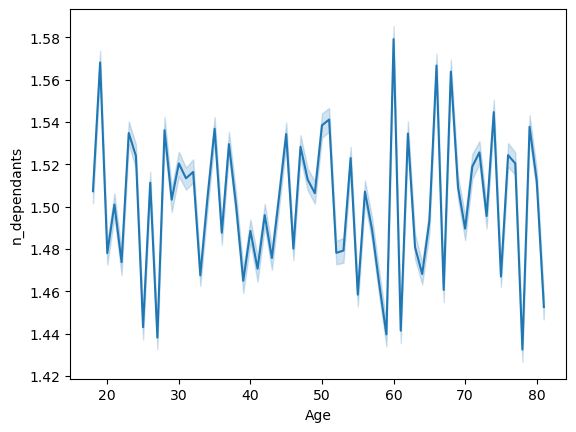

In [30]:
# Creating a line chart

line_2 = sns.lineplot(data = sample_2, x = 'Age', y = 'n_dependants')

##### The line chart shows a random distribution of number of dependants based on age meaning there's no relationship between age and number of dependants.

### Question 7
##### Cheking if there’s a connection between age and income

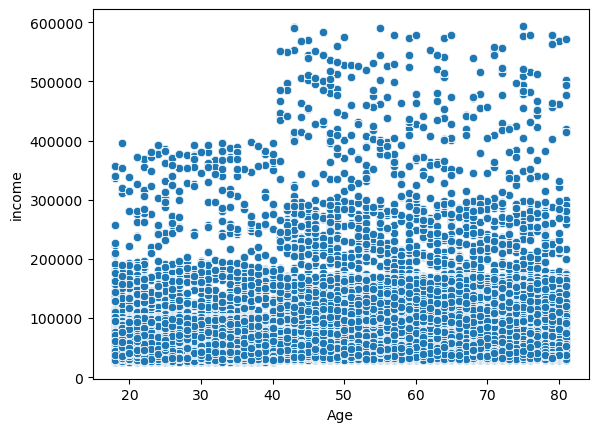

In [45]:
# Creating a scatterplot

scatterplot = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_cus)

##### The scatterplot shows that the majority of incomes are below 200K for all ages. In detail, for ages 40 and below, the  max income are below 400K. For ages above 40, there is a large concentration of incomes between and 200K and 300K and there are incomes that reach as high as 600K.

### Question 8
##### Exporting Visualizations

In [32]:
# Exporting histogram

hist.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

In [53]:
# Exporting bar chart

bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_loyalty.png'), bbox_inches='tight')

In [34]:
# Exporting line chart

line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_order_hour_of_day_prices.png'))

In [35]:
# Exporting line chart

line_2.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_2_age_dependant.png'))

In [46]:
# Exporting scatterplot

scatterplot.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'scatterplot_Age_income.png'))

In [1]:
# Creating a scatterplot

scatterplot_2 = sns.scatterplot(x = 'proces', y = 'prices', data = ords_prods_cus)

NameError: name 'sns' is not defined